In [1]:
pwd

'/Users/surajpawar/Desktop/Credit Risk Analysis for extending banking loans'

In [2]:
import pandas as pd 
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [7]:
%matplotlib inline

In [8]:
df = pd.read_csv("/Users/surajpawar/Desktop/Credit Risk Analysis for extending banking loans/bankloans.csv")

df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [9]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [10]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Length: 700, dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

<Axes: xlabel='age', ylabel='income'>

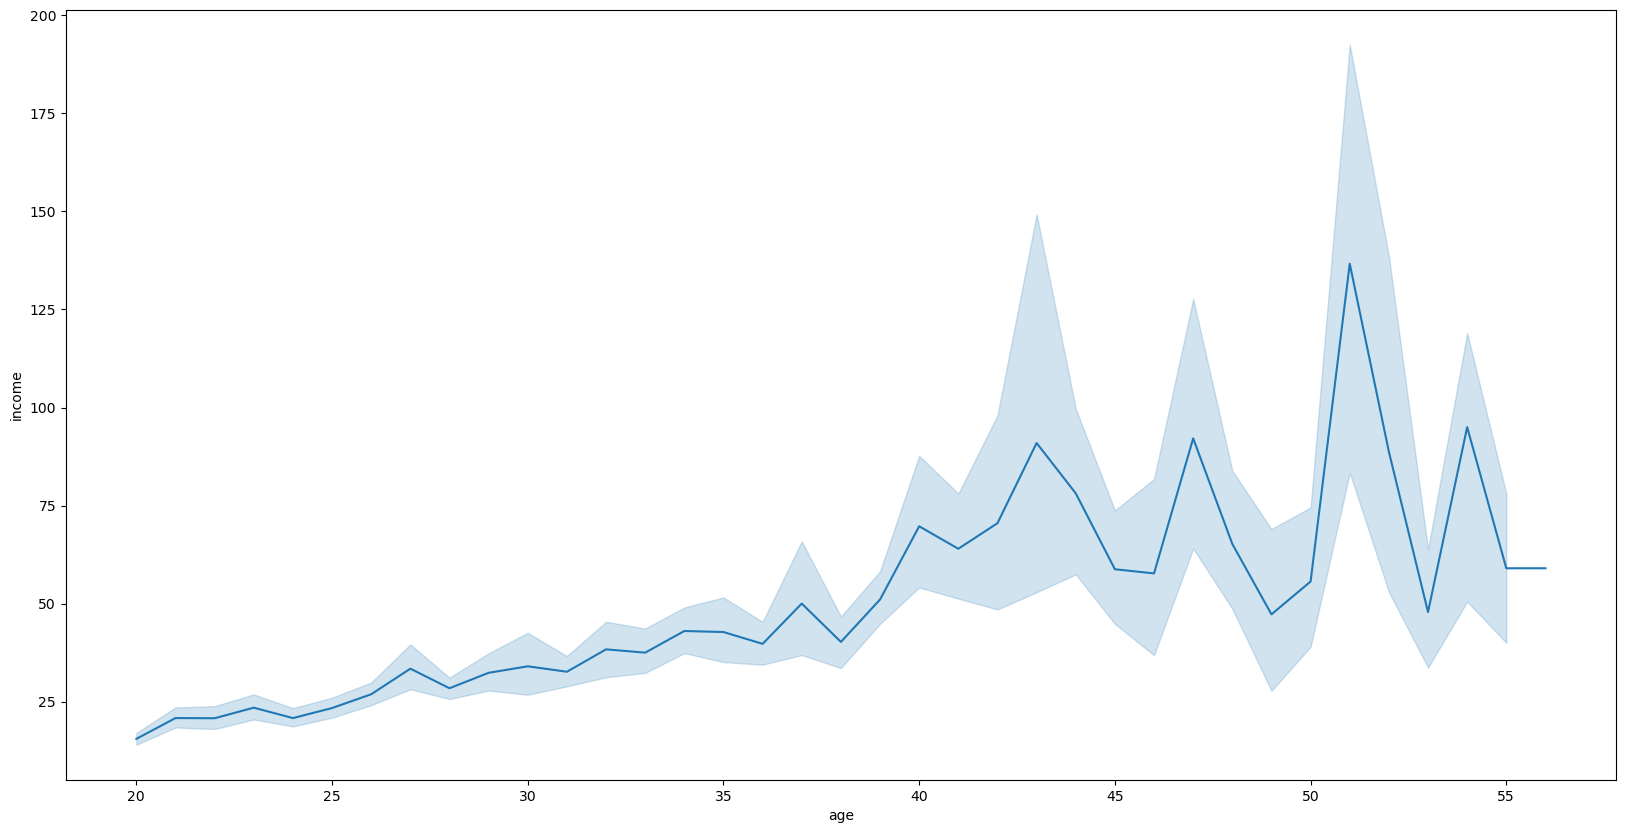

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x = 'age', y = 'income', data = df, ax=ax)

<Axes: xlabel='age', ylabel='debtinc'>

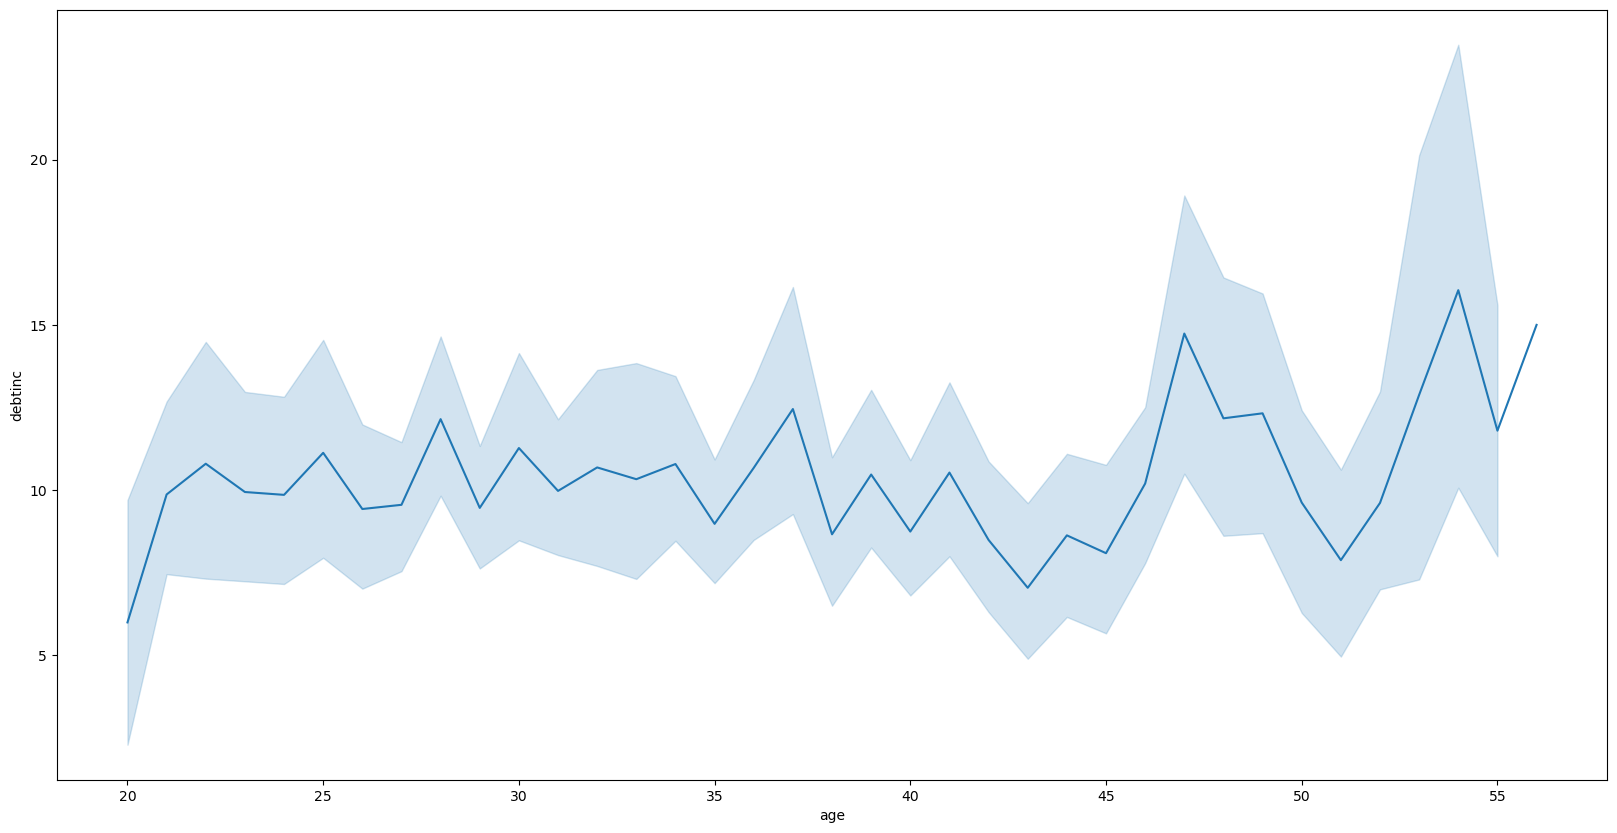

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x = 'age', y = 'debtinc', data = df, ax=ax)

In [15]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [16]:
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [17]:
x = df.drop(['default'], axis = 1) 
y = df['default']

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [19]:
SC = StandardScaler()
xtrain = SC.fit_transform(xtrain)
xtest = SC.fit_transform(xtest)

In [20]:
RFC = RandomForestClassifier(n_estimators=200)

In [21]:
RFC.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=200)

In [22]:
RFC.score(xtest, ytest)

0.8

In [23]:
RFC2 = cross_val_score(estimator=RFC, X=xtrain, y=ytrain, cv=10)
RFC2.mean()

0.7910714285714284

In [24]:
SV = SVC()
SV.fit(xtrain, ytrain)

SVC()

In [25]:
SV.score(xtest, ytest)

0.7928571428571428

In [26]:
model = GridSearchCV(SV, {
    'C':[0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
    'gamma':[0.1, 0.2, 0.4, 0.8, 1.0, 2.0, 3.0],
    'kernel':['rbf', 'linear']
}, scoring='accuracy', cv=10)

In [27]:
model.fit(xtrain, ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.2, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [28]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [29]:
model2 = SVC(C=0.1, gamma =0.1, kernel='linear')
model2.fit(xtrain, ytrain)
model2.score(xtest, ytest)

0.8214285714285714

In [30]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)
LR.score(xtest, ytest)

0.8357142857142857

<Axes: >

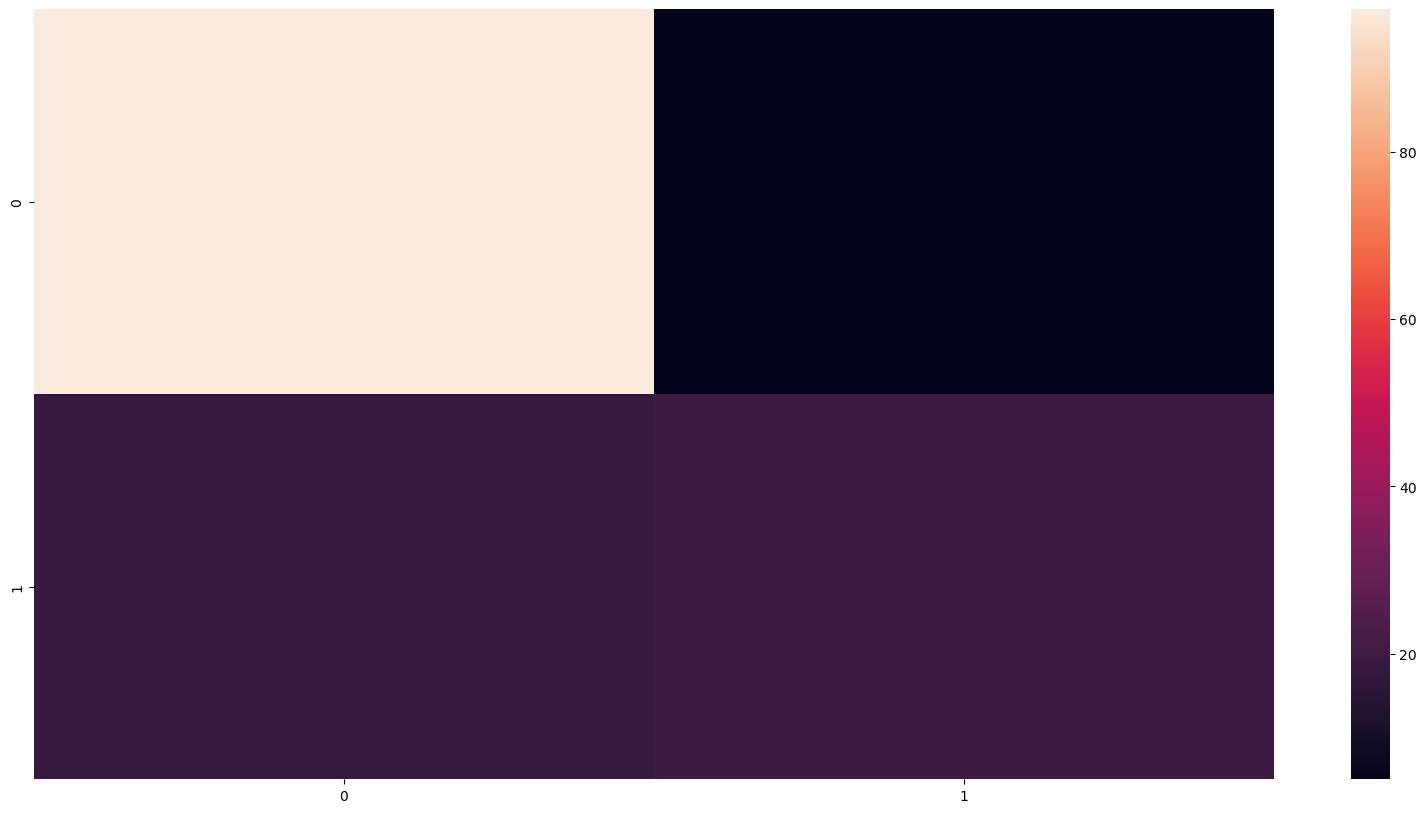

In [32]:
y_predicted = LR.predict(xtest)
C = confusion_matrix(ytest, y_predicted)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(C, ax=ax)